In [1]:
!pip install -e ../

Obtaining file:///home/dg22309/Desktop/bayes_evals
  Preparing metadata (setup.py) ... done
  Attempting uninstall: bayes_evals
    Found existing installation: bayes_evals 0.1
    Uninstalling bayes_evals-0.1:
      Successfully uninstalled bayes_evals-0.1
  DEPRECATION: Legacy editable install of bayes_evals==0.1 from file:///home/dg22309/Desktop/bayes_evals (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for bayes_evals


In [2]:
import bayes_evals as be
import pandas as pd

In [3]:
# Load the data (should NOT contain an index column)
eval_data = pd.read_csv('data/langchain_data_tool_use_FULL.csv')
# remove first two columns
eval_data = eval_data.iloc[:, 2:]
print(f"Data shape: {eval_data.shape}")
print(eval_data)

Data shape: (20, 9)
    claude-2.1  mixtral-8x7b-instruct  mistral-7b-instruct  \
0          1.0                    0.0                  1.0   
1          1.0                    1.0                  0.0   
2          1.0                    1.0                  0.0   
3          1.0                    0.0                  0.0   
4          1.0                    1.0                  0.0   
5          1.0                    1.0                  0.0   
6          1.0                    1.0                  0.0   
7          1.0                    1.0                  0.0   
8          1.0                    0.0                  0.0   
9          1.0                    1.0                  0.0   
10         1.0                    0.0                  0.0   
11         1.0                    1.0                  0.0   
12         1.0                    1.0                  0.0   
13         1.0                    1.0                  0.0   
14         1.0                    1.0             

In [4]:
# Analyse the data
evals = be.analyse(eval_data)
print(evals)

EvalsData Obj: 9 models, 20 questions


Getting independent indep_intervals
Error Bars:
                           claude-2.1: [0.83890238 0.99879512]
                mixtral-8x7b-instruct: [0.38435439 0.78180314]
                  mistral-7b-instruct: [0.01174932 0.23815991]
gpt-3.5-turbo-0613-openai (functions): [0.29780684 0.70219316]
       gpt-3.5-turbo-1106 (functions): [0.1128094  0.47165983]
               gpt-4-0613 (functions): [0.21819686 0.61564561]
       gpt-4-1106-preview (functions): [0.69622559 0.96951103]
                    llama-v2-13b-chat: [0.00120488 0.16109762]
                    llama-v2-70b-chat: [0.03048897 0.30377441]


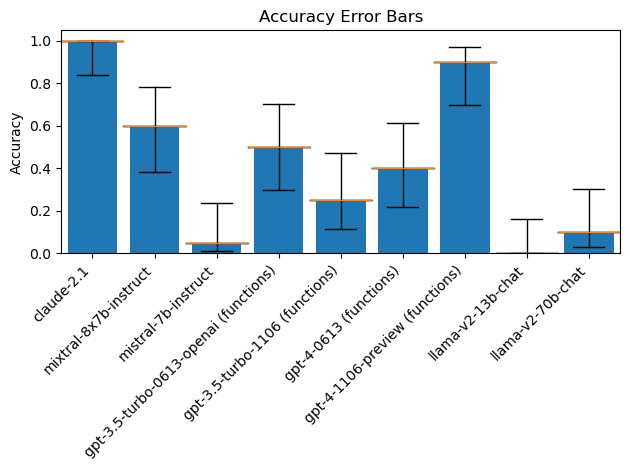

In [5]:

# Get the results either for individual LLMs (each column in the data)...
print("Getting independent indep_intervals")
indep_intervals = evals.independent_intervals()
indep_intervals.print()
indep_intervals.plot()


Getting independent comparisons
Comparison Matrix:
                                       claude-2.1  mixtral-8x7b-instruct  \
claude-2.1                                    NaN                 0.9993   
mixtral-8x7b-instruct                      0.0007                    NaN   
mistral-7b-instruct                        0.0000                 0.0000   
gpt-3.5-turbo-0613-openai (functions)      0.0000                 0.2696   
gpt-3.5-turbo-1106 (functions)             0.0000                 0.0140   
gpt-4-0613 (functions)                     0.0000                 0.1087   
gpt-4-1106-preview (functions)             0.1194                 0.9846   
llama-v2-13b-chat                          0.0000                 0.0000   
llama-v2-70b-chat                          0.0000                 0.0005   

                                       mistral-7b-instruct  \
claude-2.1                                          1.0000   
mixtral-8x7b-instruct                               1.0000   
mi

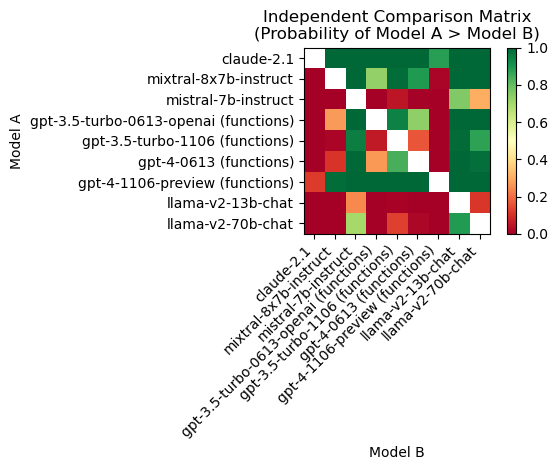

In [6]:
# ... in which case you can then do independent LLM comparisons...
print("Getting independent comparisons")
indep_comparisons = evals.independent_comparisons()
indep_comparisons.print()
indep_comparisons.plot()

Getting paired comparisons
Comparison Matrix:
                                       claude-2.1  mixtral-8x7b-instruct  \
claude-2.1                                    NaN                 0.9972   
mixtral-8x7b-instruct                      0.0024                    NaN   
mistral-7b-instruct                        0.0000                 0.0006   
gpt-3.5-turbo-0613-openai (functions)      0.0009                 0.2530   
gpt-3.5-turbo-1106 (functions)             0.0000                 0.0195   
gpt-4-0613 (functions)                     0.0002                 0.1291   
gpt-4-1106-preview (functions)             0.1227                 0.9921   
llama-v2-13b-chat                          0.0000                 0.0000   
llama-v2-70b-chat                          0.0000                 0.0007   

                                       mistral-7b-instruct  \
claude-2.1                                          1.0000   
mixtral-8x7b-instruct                               0.9993   
mistral

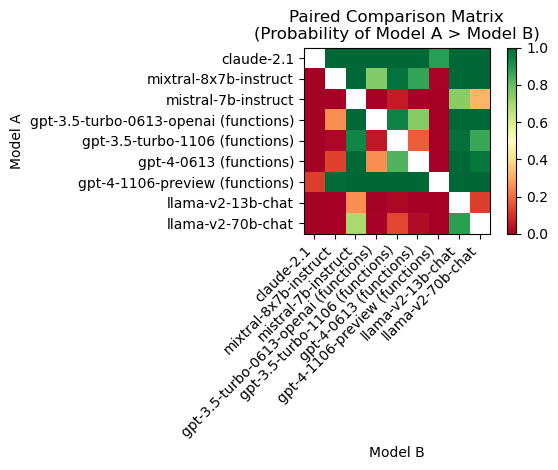

In [7]:
# ... or get pairwise comparisons between LLMs
print("Getting paired comparisons")
paired_comparisons = evals.paired_comparisons()
paired_comparisons.print()
paired_comparisons.plot()